In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df = df.drop(['Id'], axis=1)

In [4]:
from sklearn.cluster import KMeans
wcss = []
X = df.drop(['Species'], axis=1)
for i in range(1, 11):
    classifier = KMeans(n_clusters = i)
    classifier.fit(X)
    wcss.append(classifier.inertia_)

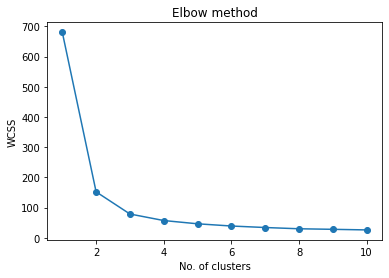

In [5]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [6]:
clf = KMeans(n_clusters = 3)
Y = clf.fit_predict(X)

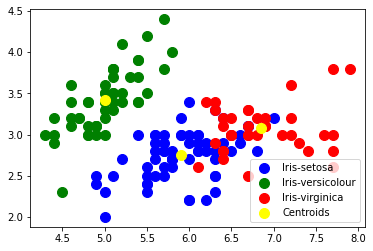

In [7]:
X = np.array(X)
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s = 100, c = 'red', label = 'Iris-virginica')

# Visualizing centroids of the clusters
plt.scatter(clf.cluster_centers_[:, 0], clf.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()